In [1]:
%run C:\Users\s162605\Documents\Studie\JAAR3\BEP\sterren\Lissa.ipynb

# dit stuk is uit IFERC_ALL
def nucleus(E, t, diag=False):
    # Peak detection
    maxtab, mintab = peakdet(E, 0.001, x=t)
    
    # A fitting to the peak values to get the decay coefficient:
    result = gmodel.fit(E[:150], t=t[:150], decay=10, nan_policy='propagate')

    # Can you guess the residual?
    if 0.95 <= np.abs(E[-1]/mintab[0, 1]) <= 1.02:
        print('residual? :' + str(mintab[0, 1]))
        
    # Maxpeaks
    a = maxtab[0, :]  # Initial point
    
    if np.shape(maxtab) != (2, 2):  # If there are more points than a and i:
        b1 = maxtab[1, :]  # Second Peak
        i = maxtab[2, :]            
    elif np.shape(maxtab) == (2, 2):
        i = maxtab[1, :]
        b1 = i
        print('i point is the first one')     
    
    # Minpeaks
    b2 = mintab[0, :]  # (Technically) The lowest point
       
    min_index, min_value = min(enumerate(mintab[:, 1]), key=operator.itemgetter(1))  
    f = mintab[min_index, :]  # This determines the minimum peak
    
    if np.shape(mintab) != (1, 2):
        e = mintab[1, :]
    else:
        e = f

    # The initial bump is not detected if the points e & i are both > 0.32
    if b1[0] > 60:
        i = b1
        if i[1] < 0:
            i = maxtab[2, :]
        e = b2
        b1, b2, BR = np.nan, np.nan, np.nan
        GR1, GR2, PE2 = np.nan, np.nan, np.nan
    else:
        BR = np.abs(b2[1] / a[1])                      # Bump ratio
        GR1 = np.abs((e[1]-a[1]) / (b2[1]-a[1]))       # Bump growth ratio
        GR2 = np.abs(e[1] / b2[1])                     # Growth ratio
        PE2 = np.abs(e[0] - b2[0])                     # Bump period

    if isinstance(b2, float) and np.shape(mintab) != (1, 2):  # if b2 does not exist and mintab has more than 1 point
        o = mintab[1, :]
        if o[0] < i[0]:
            o = mintab[2, :]
        DR = np.abs(o[1] / e[1])                       # Decay ratio
        PE = np.abs(o[0] - e[0])                       # Decay period
    elif isinstance(b2, float) == False and np.shape(mintab)[0] >=3:  # if b2 exists and the shape of mintab is >=3
        o = mintab[2, :]
        DR = np.abs(o[1] / e[1])  # Decay ratio
        PE = np.abs(o[0] - e[0])  # Decay period
    else:
        o = np.nan
        DR = np.nan  # Decay ratio
        PE = np.nan  # Decay period

    TP = e[0]                                          # Peak time
    OS = np.abs(e[1] / a[1])                           # Overshoot ratio
                      
    if diag == True:
        print('Diag mode on')
        
        return maxtab, mintab, OS, BR, GR1, GR2, DR, PE, PE2, TP, a, b1, b2, e, i, o
    else:

        return result, OS, DR, TP

loading successful!


Integral over Q is: 60.6164959424759
Integral over E is: 4.921177945986169
Integral over e is: 7.780063565136814


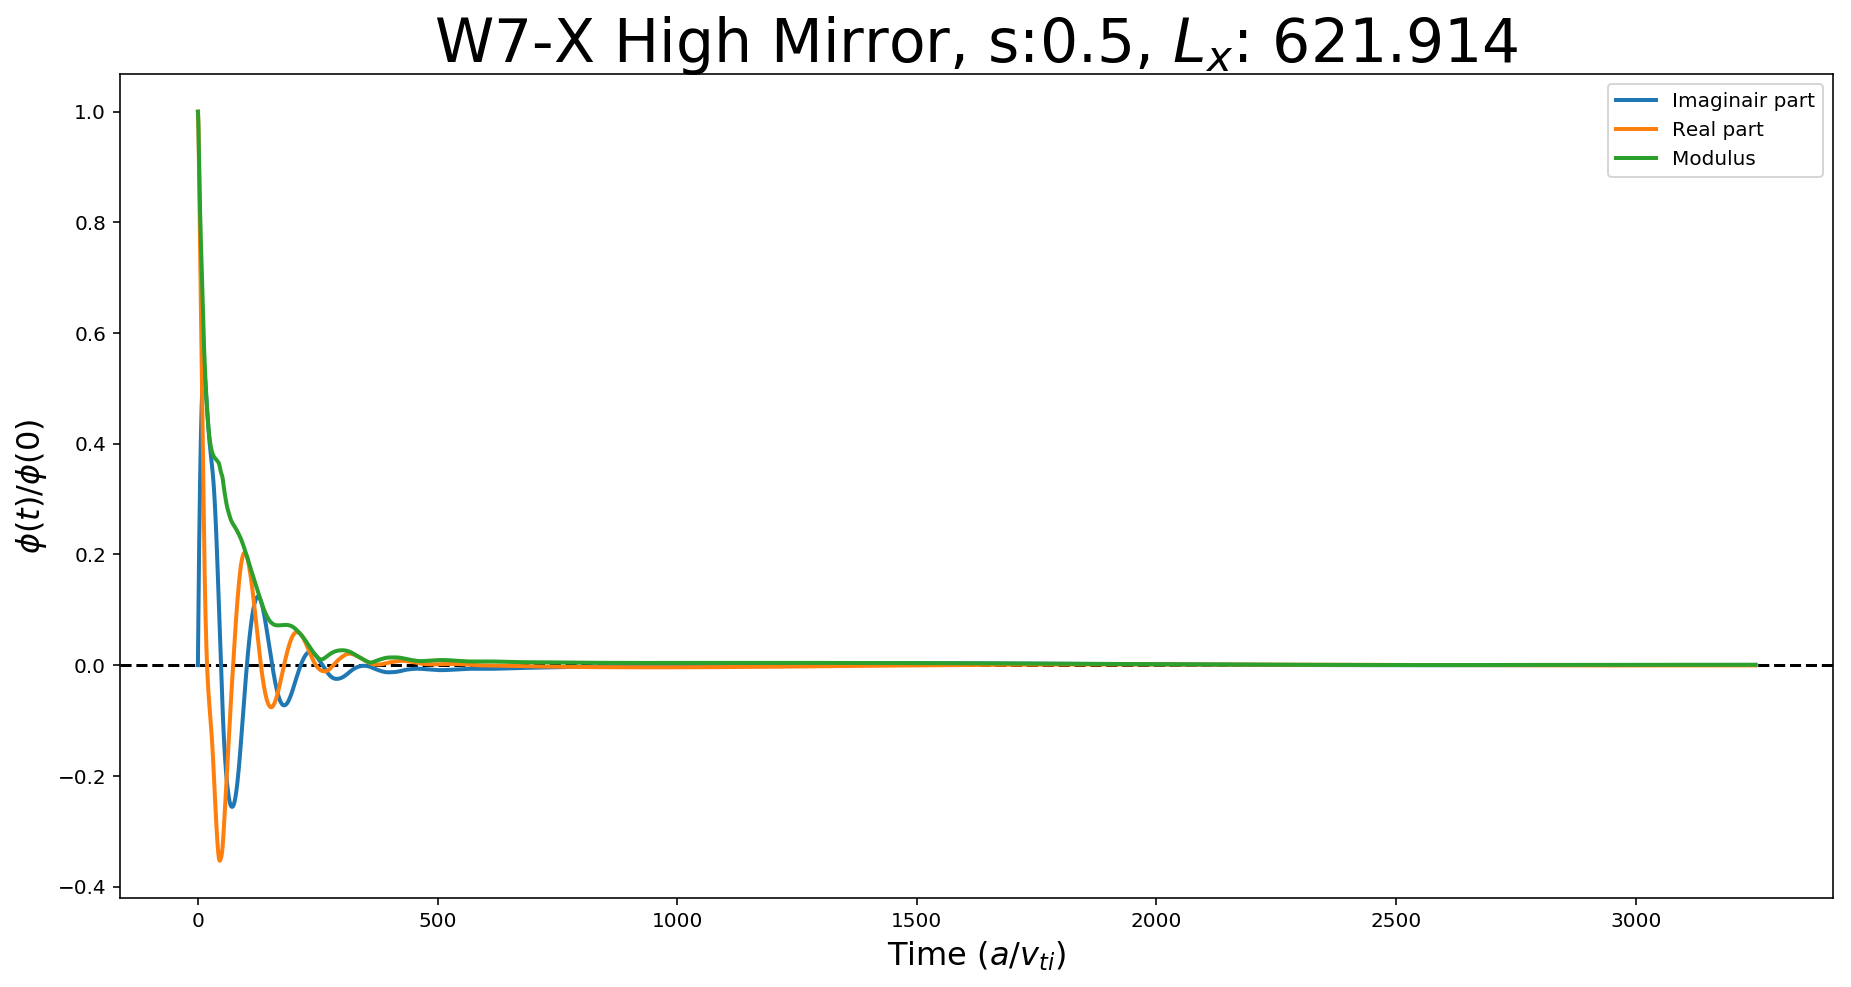

In [2]:
#standard code that works with the newest version of the data. below you find the comparison between the old and the new datasets
data = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/621.914/gamdiagions_act.dat')

E = (data[:,1]*(1/data[0, 1]))
e = (data[:,2]*(1/data[0, 1]))
t = data[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.5, $L_{x}$: 621.914', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')

Q = np.sqrt(E**2+e**2)
ax1.plot(t, e, linewidth=2, label=('Imaginair part'))
ax1.plot(t, E, linewidth=2, label=('Real part'))
ax1.plot(t, Q, linewidth=2, label=('Modulus'))
plt.legend()

fig.tight_layout()
#plt.savefig('../../CMSS_2018/Poster/Salpha_nlzf_plot.pdf', format='pdf', dpi=1200)    

integ1 = (np.trapz(Q,t))
integ2 = (np.trapz(E,t))
integ3 = (np.trapz(e,t))

print("Integral over Q is:", integ1)
print("Integral over E is:", integ2)
print("Integral over e is:", integ3)

In [3]:
#to make sure it takes into account all values until the end of the data and to determine the standard deviation in the residual
n=0
teller=0
residual=0
nfix=0
finalvaluedata=8784 
while n < finalvaluedata:
    if abs((Q[n+1]-Q[n])/(t[n+1]-t[n])) < 0.00001:
        teller=teller+1 #telt hoe lang de afgeleide binnen het bereik valt
        residual=(residual*(n-nfix)+Q[n])/(n+1-nfix)#to get as residual the average over all the Q values in the region where the absolute value of the derivative is less than 0.00001
    else:
        teller=0
        residual=0
        nfix = (n+1)
    n=n+1
print("Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:")
print("The values of n, Q[n] and t at the start of the averaging are: n =", n-teller, ", Q =", Q[n-teller], ", t =", t[n-teller])
print("The amount of data points over which the average is taken =", teller)
listofqvalues=Q[(n-teller):n]#necessary to use ':n' instead of just ':'. checked that mean of this list is the same as the residual determined by the code
std=np.std(listofqvalues)
#meanres=np.mean(listofqvalues)
print("The residual value is:",residual, "+-", std)

Assuming that the residual is the average value of Q from the point where the absolute value of the derivative of Q  becomes less than 0.00001 and stays below that value onwards till the end of the data, we can say that:
The values of n, Q[n] and t at the start of the averaging are: n = 2051 , Q = 0.0046317758244808676 , t = 758.87
The amount of data points over which the average is taken = 6733
The residual value is: 0.002059967473683929 +- 0.0015654634373006373


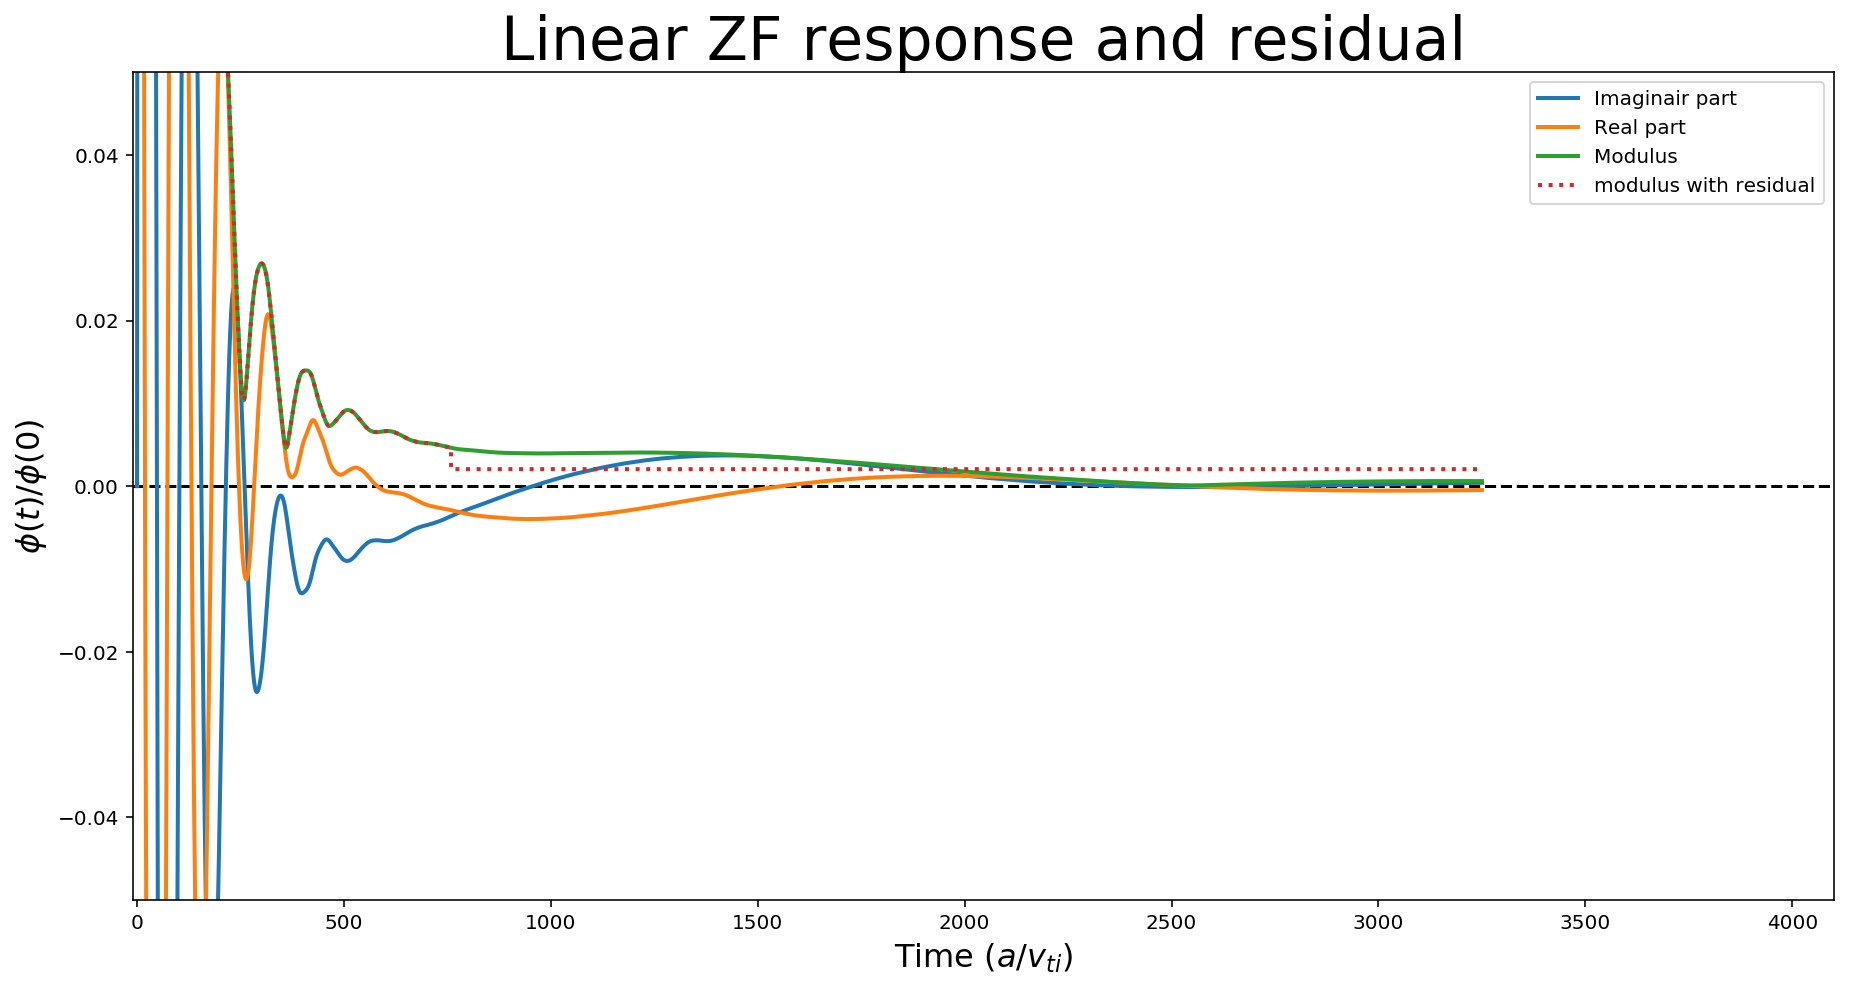

In [4]:
residuallist = [] ##
a = 0 ##
while a < finalvaluedata+1:##
    if a < n-teller:
        residuallist.append(Q[a])
    else:
        residuallist.append(residual)
    a = a+1##
#print(residuallist)

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('Linear ZF response and residual', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')
plt.xlim([-10,4100])
plt.ylim([-0.05,0.05])

ax1.plot(t, e, linewidth=2, label=('Imaginair part'))
ax1.plot(t, E, linewidth=2, label=('Real part'))
ax1.plot(t, Q, linewidth=2, label=('Modulus'))
ax1.plot(t,residuallist,linewidth=2,label=('modulus with residual'),linestyle='dotted')
plt.legend()
fig.tight_layout()

Integral over Q_old is: 60.6164959424759
Integral over Q_new is: 60.6164959424759
Integral over Q_new2 is: 62.359687155748645
Integral over E_old is: 4.921177945986169
Integral over E_new is: 4.921177945986169
Integral over E_new2 is: 5.132572153080778
Integral over e_old is: 7.780063565136814
Integral over e_new is: 7.780063565136814
Integral over e_new2 is: 7.718617409038815


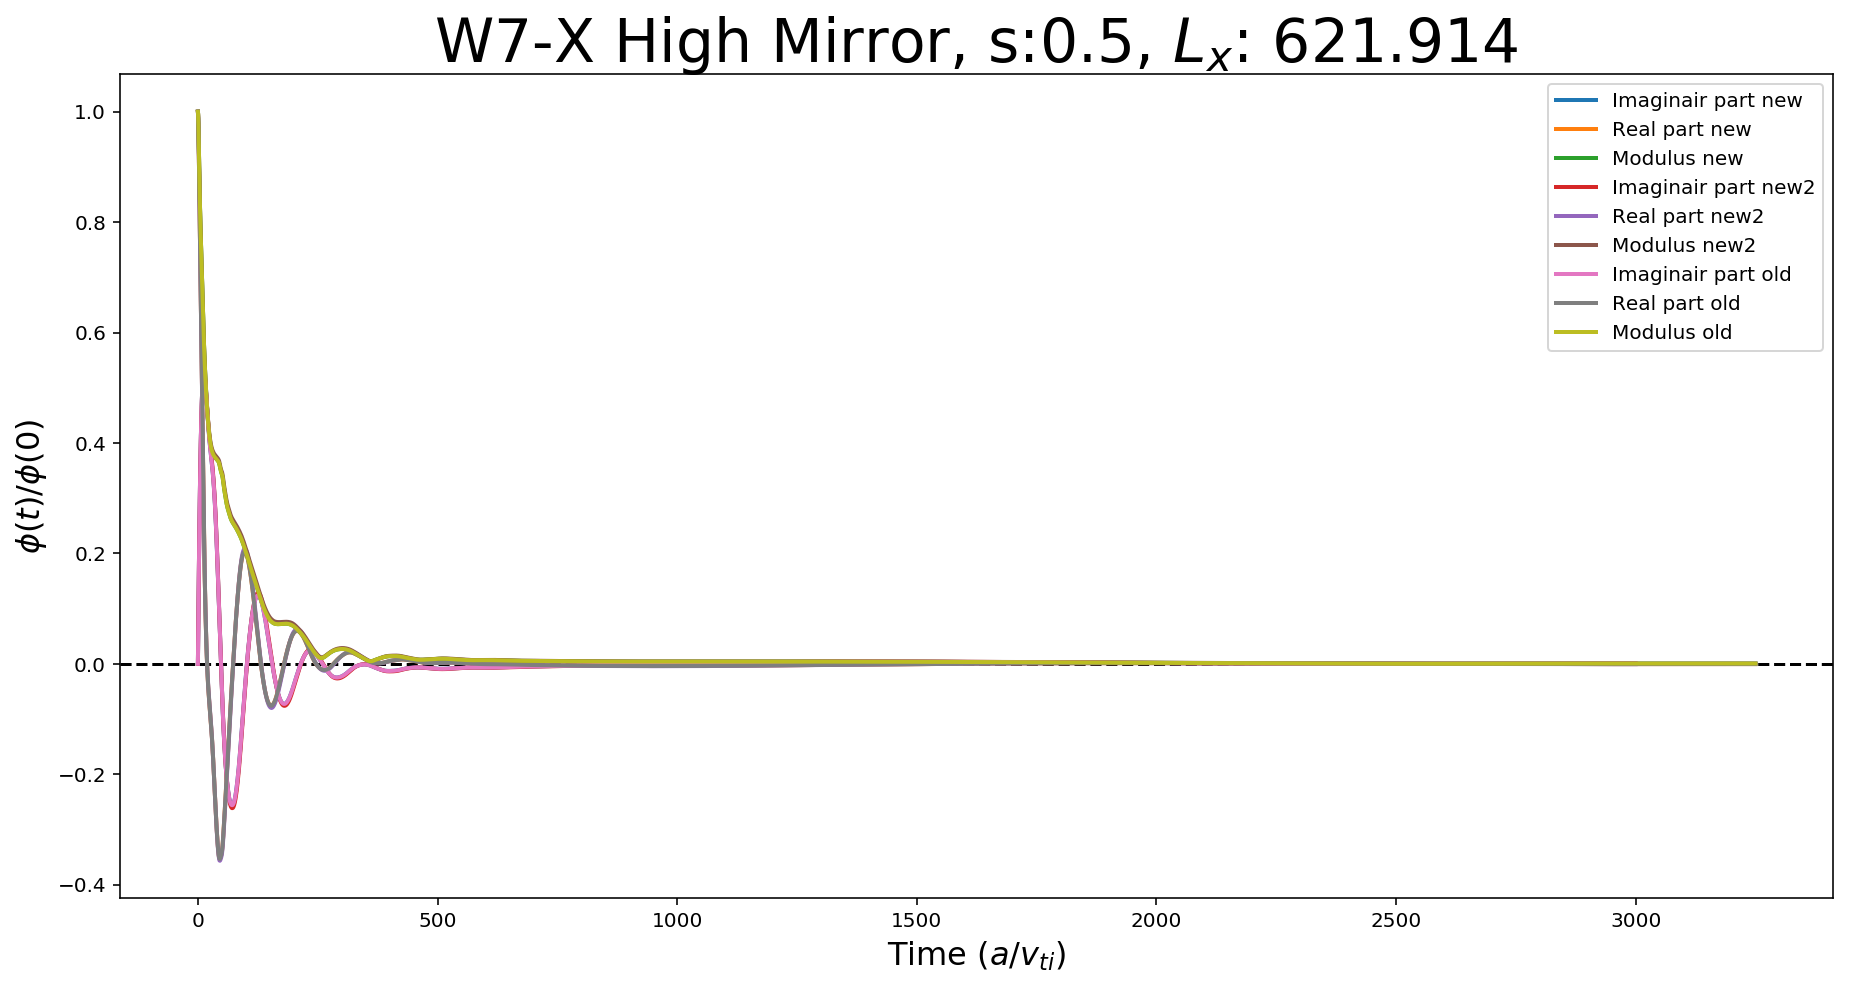

In [2]:
#Comparison old and new datasets 
datanew = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/W7Xhms05/GAM/621.914/gamdiagions_act.dat')
dataold = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/Emmasnotebooks/kopievanalleeerstedata/dataset4.dat')
datanew2 = pylab.loadtxt('C:/Users/s162605/Documents/Studie/JAAR3/BEP/sterren/IFERC/new/w7xhms05_Lx-621.914/diag/gamdiagions_act.dat')
E_new = (datanew[:,1]*(1/datanew[0, 1]))
e_new = (datanew[:,2]*(1/datanew[0, 1]))
t_new = datanew[:,0]
E_old = (dataold[:,1]*(1/dataold[0, 1]))
e_old = (dataold[:,2]*(1/dataold[0, 1]))
t_old = dataold[:,0]
E_new2 = (datanew2[:,1]*(1/datanew2[0, 1]))
e_new2 = (datanew2[:,2]*(1/datanew2[0, 1]))
t_new2 = datanew2[:,0]

fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('W7-X High Mirror, s:0.5, $L_{x}$: 621.914', fontsize=30)
ax1.set_xlabel('Time ($a / v_{ti}$)',fontsize=16)
ax1.set_ylabel('$\phi (t) / \phi (0)$',fontsize=16)
ax1.axhline(y=0, color='black', linestyle='dashed')

Q_new = np.sqrt(E_new**2+e_new**2)
ax1.plot(t_new, e_new, linewidth=2, label=('Imaginair part new'))
ax1.plot(t_new, E_new, linewidth=2, label=('Real part new'))
ax1.plot(t_new, Q_new, linewidth=2, label=('Modulus new'))
Q_new2 = np.sqrt(E_new2**2+e_new2**2)
ax1.plot(t_new2, e_new2, linewidth=2, label=('Imaginair part new2'))
ax1.plot(t_new2, E_new2, linewidth=2, label=('Real part new2'))
ax1.plot(t_new2, Q_new2, linewidth=2, label=('Modulus new2'))
Q_old = np.sqrt(E_old**2+e_old**2)
ax1.plot(t_old, e_old, linewidth=2, label=('Imaginair part old'))
ax1.plot(t_old, E_old, linewidth=2, label=('Real part old'))
ax1.plot(t_old, Q_old, linewidth=2, label=('Modulus old'))
plt.legend()
fig.tight_layout()

integ1_new = (np.trapz(Q_new,t_new))
integ2_new = (np.trapz(E_new,t_new))
integ3_new = (np.trapz(e_new,t_new))
integ1_old = (np.trapz(Q_old,t_old))
integ2_old = (np.trapz(E_old,t_old))
integ3_old = (np.trapz(e_old,t_old))
integ1_new2 = (np.trapz(Q_new2,t_new2))
integ2_new2 = (np.trapz(E_new2,t_new2))
integ3_new2 = (np.trapz(e_new2,t_new2))
print("Integral over Q_old is:", integ1_old)
print("Integral over Q_new is:", integ1_new)
print("Integral over Q_new2 is:", integ1_new2)
print("Integral over E_old is:", integ2_old)
print("Integral over E_new is:", integ2_new)
print("Integral over E_new2 is:", integ2_new2)
print("Integral over e_old is:", integ3_old)
print("Integral over e_new is:", integ3_new)
print("Integral over e_new2 is:", integ3_new2)